# Problem Statement

Understanding the problem statement is the first and foremost step. This helps us give an intuition of what we will face ahead of time. Let us see the problem statement: 

This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behaviour of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioural variables.

## Data Dictionary

**Features**

|Feature|Feature Type|Description|
|-----|-----|-----|
|CUST_ID|Categorical|Credit card holder ID|
|BALANCE|Numerical|Monthly average balance (based on daily balance averages)|
|BALANCE_FREQUENCY|Numerical|Ratio of last 12 months with balance|
|PURCHASES|Numerical|Total purchase amount spent during last 12 months|
|ONEOFF_PURCHASES|Numerical|Total amount of one-off purchases|
|INSTALLMENTS_PURCHASES|Numerical|Total amount of installment purchases|
|CASH_ADVANCE|Numerical|Total cash-advance amount|
|PURCHASES_ FREQUENCY|Numerical|Frequency of purchases (percentage of months with at least on purchase)|
|ONEOFF_PURCHASES_FREQUENCY|Numerical|Frequency of one-off-purchases|
|PURCHASES_INSTALLMENTS_FREQUENCY|Numerical|Frequency of installment purchases|
|CASH_ADVANCE_ FREQUENCY|Numerical|Cash-Advance frequency|
|CASH_ADVANCE_TRX|Numerical|Average amount per cash-advance transaction|
|PURCHASES_TRX|Numerical|Average amount per purchase transaction|
|CREDIT_LIMIT|Numerical|Credit limit|
|PAYMENTS|Numerical|Total payments (due amount paid by the customer to decrease their statement balance) in the period|
|MINIMUM_PAYMENTS|Numerical|Total minimum payments due in the period|
|PRC_FULL_PAYMENT|Numerical|Percentage of months with full payment of the due statement balance|
|TENURE|Numerical|Number of months as a customer|

In [1]:
#Let's import the required libraries

import os
import pandas as pd                                                           # For working with DataFrames
import numpy as np                                                            # For mathematical calculations 
import seaborn as sns                                                         # For data visualization 
import matplotlib.pyplot as plt                                               # For plotting graphs 
%matplotlib inline 
sns.set()
from sklearn.preprocessing import MinMaxScaler                                # For scaling the features
from factor_analyzer import FactorAnalyzer                                    # For Factor Analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity     # For Bartlett's test
from factor_analyzer.factor_analyzer import calculate_kmo                     # For KMO test
from sklearn.cluster import KMeans                                            # For K-Means clustering
from sklearn.decomposition import PCA                                         # For Principal Component Analysis
import warnings                                                               # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
#Setting the working directory
os.chdir("C:/Users/user/Desktop/edWisor/Project/Credit Card Segmentation")

In [3]:
#Loading the data
data = pd.read_csv("credit-card-data.csv")

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df = data.copy()

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
#Let's drop the CUST_ID feature since we won't be needing it for our analysis.
df = df.drop('CUST_ID', axis = 1)

In [11]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Missing Value Analysis

In this step we will find the missing values in our dataset and will impute them with either mean or median since they are all numerical type features.

In [12]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

missing_val

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


There are missing values in two features, CREDIT_LIMIT and MINIMUM_PAYMENTS. We have to decide whether we will impute them with mean or median.
 So, let's take a look at their distributions.

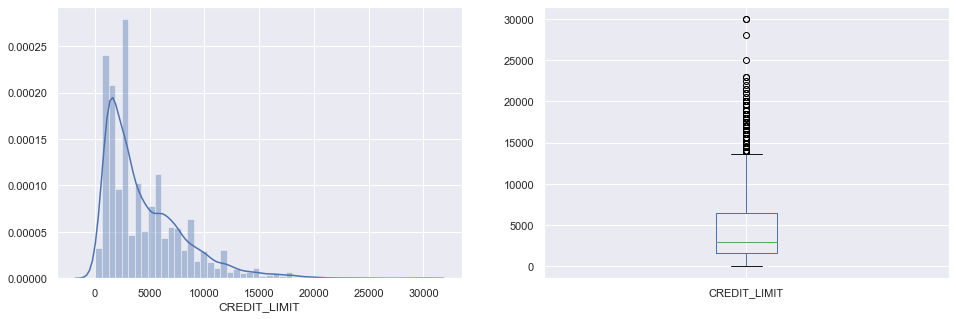

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CREDIT_LIMIT']); 
plt.subplot(122)
df['CREDIT_LIMIT'].plot.box(figsize=(16,5)) 
plt.show()

- Since, we have outliers in the CREDIT_LIMIT feature, we will impute the missing values with median. 

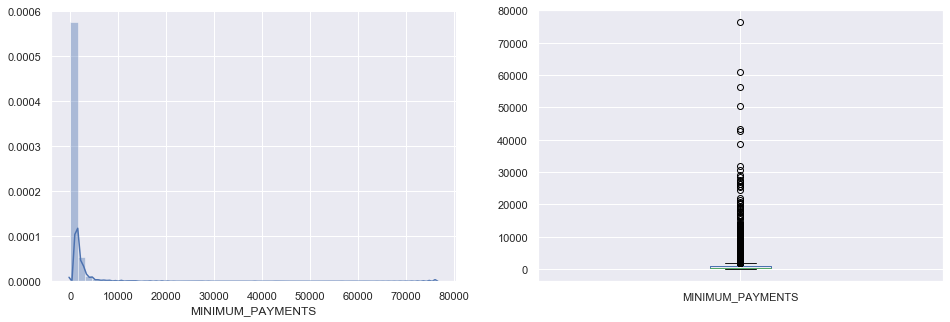

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['MINIMUM_PAYMENTS']); 
plt.subplot(122)
df['MINIMUM_PAYMENTS'].plot.box(figsize=(16,5)) 
plt.show()

- Since, we have outliers in the MINIMUM_PAYMENTS feature, we will impute the missing values with median. 

Let's impute the missing values with median.

In [15]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace = True)

In [16]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

In [17]:
missing_val = pd.DataFrame(df.isnull().sum())

missing_val

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


No missing values anymore.

# Feature Engineering

In this step, we will derive new features by combining the existing ones to gain new insights from our dataset.

## KPI (Key Performance Indicator) : 

A Key Performance Indicator is a measurable value that demonstrates how effectively a company is achieving key business objectives.

Let's derive some new KPIs (features) from our existing features. 

### (1) Monthly Average Purchase

In [18]:
df['MONTHLY_AVERAGE_PURCHASE'] = df['PURCHASES'] / df['TENURE']

In [19]:
df['MONTHLY_AVERAGE_PURCHASE']

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Name: MONTHLY_AVERAGE_PURCHASE, Length: 8950, dtype: float64

### (2) Monthly Cash Advance Amount

In [20]:
df['MONTHLY_CASH_ADVANCE_AMOUNT'] = df['CASH_ADVANCE'] / df['TENURE']

In [21]:
df['MONTHLY_CASH_ADVANCE_AMOUNT']

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Name: MONTHLY_CASH_ADVANCE_AMOUNT, Length: 8950, dtype: float64

### (3) Average Amount Per Purchase

Average Amount Per Purchase is the ratio of PURCHASES to PURCHASES_TRX. Many of the customers have made no purchases, hence they have 0 in their PURCHASES and PURCHASES_TRX features. Due to this we will have 0/0 instead of 0 in their Average Amount Per Purchase feature which we want to avoid. 
So, to fix this we will create a copy of PURCHASES_TRX feature and replace the 0s with 1s in the copy. Then we will use the copy in order to get 0s in their Average Amount Per Purchase.

In [22]:
df['PURCHASES_TRX_COPY'] = df['PURCHASES_TRX']

In [23]:
df['PURCHASES_TRX_COPY'].head(20)

0      2
1      0
2     12
3      1
4      1
5      8
6     64
7     12
8      5
9      3
10    12
11     6
12    26
13    26
14     0
15    11
16     0
17     8
18     9
19    12
Name: PURCHASES_TRX_COPY, dtype: int64

In [24]:
df['PURCHASES_TRX_COPY'] = df['PURCHASES_TRX_COPY'].replace(0,1)

In [25]:
df['PURCHASES_TRX_COPY'].head(20)

0      2
1      1
2     12
3      1
4      1
5      8
6     64
7     12
8      5
9      3
10    12
11     6
12    26
13    26
14     1
15    11
16     1
17     8
18     9
19    12
Name: PURCHASES_TRX_COPY, dtype: int64

In [26]:
df['AVERAGE_AMOUNT_PER_PURCHASE'] = df['PURCHASES'] / df['PURCHASES_TRX_COPY']

In [27]:
df['AVERAGE_AMOUNT_PER_PURCHASE']

0         47.700000
1          0.000000
2         64.430833
3       1499.000000
4         16.000000
           ...     
8945      48.520000
8946      50.000000
8947      28.880000
8948       0.000000
8949      47.532609
Name: AVERAGE_AMOUNT_PER_PURCHASE, Length: 8950, dtype: float64

In [28]:
df['AVERAGE_AMOUNT_PER_PURCHASE'].describe()

count    8950.000000
mean       73.958522
std       160.639988
min         0.000000
25%        12.000000
50%        41.402440
75%        78.726083
max      5981.666667
Name: AVERAGE_AMOUNT_PER_PURCHASE, dtype: float64

### (4) Average Cash Advance Transaction

Average Cash Advance Transaction is the ratio of CASH_ADVANCE to CASH_ADVANCE_TRX. Many of the customers have not taken any cash advances, hence they have 0 in their CASH_ADVANCE and CASH_ADVANCE_TRX features. Due to this we will have 0/0 instead of 0 in their Average Cash Advance Transaction feature which we want to avoid. 
So, to fix this we will create a copy of CASH_ADVANCE_TRX feature and replace the 0s with 1s in the copy. Then we will use the copy in order to get 0s in their Average Cash Advance Transaction.

In [29]:
df['CASH_ADVANCE_TRX_COPY'] = df['CASH_ADVANCE_TRX']

In [30]:
df['CASH_ADVANCE_TRX_COPY'].head(20)

0     0
1     4
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    4
16    3
17    0
18    0
19    0
Name: CASH_ADVANCE_TRX_COPY, dtype: int64

In [31]:
df['CASH_ADVANCE_TRX_COPY'] = df['CASH_ADVANCE_TRX_COPY'].replace(0,1)

In [32]:
df['CASH_ADVANCE_TRX_COPY'].head(20)

0     1
1     4
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    4
16    3
17    1
18    1
19    1
Name: CASH_ADVANCE_TRX_COPY, dtype: int64

In [33]:
df['AVERAGE_CASH_ADVANCE_TRANSACTION'] = df['CASH_ADVANCE'] / df['CASH_ADVANCE_TRX_COPY']

In [34]:
df['AVERAGE_CASH_ADVANCE_TRANSACTION'].describe()

count     8950.000000
mean       208.905117
std        535.655517
min          0.000000
25%          0.000000
50%          0.000000
75%        246.995017
max      14836.451410
Name: AVERAGE_CASH_ADVANCE_TRANSACTION, dtype: float64

### (5) Limit Usage (Balance to Credit Limit ratio)

In [35]:
df['LIMIT_USAGE'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['LIMIT_USAGE']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: LIMIT_USAGE, Length: 8950, dtype: float64

### (6) Payments to Minimum Payments ratio

In [36]:
df['PAYMENTS_TO_MINIMUM_PAYMENTS'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']
df['PAYMENTS_TO_MINIMUM_PAYMENTS']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: PAYMENTS_TO_MINIMUM_PAYMENTS, Length: 8950, dtype: float64

### (7) Purchases by Type

In [37]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 25)

In [38]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 25)

In [39]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 25)

In [40]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 25)

In [41]:
def purchase(data):
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'
    elif (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'BOTH_ONEOFF_INSTALLMENT'
    elif (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'ONE_OFF'
    elif (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENT'

In [42]:
df['PURCHASE_TYPE'] = df.apply(purchase, axis = 1)

In [43]:
df['PURCHASE_TYPE'].value_counts()

BOTH_ONEOFF_INSTALLMENT    2774
INSTALLMENT                2260
NONE                       2042
ONE_OFF                    1874
Name: PURCHASE_TYPE, dtype: int64

In [44]:
df['PURCHASE_TYPE']

0       INSTALLMENT
1              NONE
2           ONE_OFF
3           ONE_OFF
4           ONE_OFF
           ...     
8945    INSTALLMENT
8946    INSTALLMENT
8947    INSTALLMENT
8948           NONE
8949        ONE_OFF
Name: PURCHASE_TYPE, Length: 8950, dtype: object

In [45]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,MONTHLY_AVERAGE_PURCHASE,MONTHLY_CASH_ADVANCE_AMOUNT,PURCHASES_TRX_COPY,AVERAGE_AMOUNT_PER_PURCHASE,CASH_ADVANCE_TRX_COPY,AVERAGE_CASH_ADVANCE_TRANSACTION,LIMIT_USAGE,PAYMENTS_TO_MINIMUM_PAYMENTS,PURCHASE_TYPE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,7.950000,0.000000,2,47.700000,1,0.000000,0.040901,1.446508,INSTALLMENT
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.000000,536.912124,1,0.000000,4,1610.736371,0.457495,3.826241,NONE
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,64.430833,0.000000,12,64.430833,1,0.000000,0.332687,0.991682,ONE_OFF
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,124.916667,17.149001,1,1499.000000,1,205.788017,0.222223,0.000000,ONE_OFF
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,1.333333,0.000000,1,16.000000,1,0.000000,0.681429,2.771075,ONE_OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,48.520000,0.000000,6,48.520000,1,0.000000,0.028494,6.660231,INSTALLMENT
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,50.000000,0.000000,6,50.000000,1,0.000000,0.019183,0.883197,INSTALLMENT
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,6,24.066667,0.000000,5,28.880000,1,0.000000,0.023399,0.986076,INSTALLMENT
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,6,0.000000,6.093130,1,0.000000,2,18.279389,0.026915,0.942505,NONE


### Let's draw some insights from the derived KPIs.

### (1) Monthly Average Purchase

Text(0.5, 1.0, 'Mean monthly average purchases of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

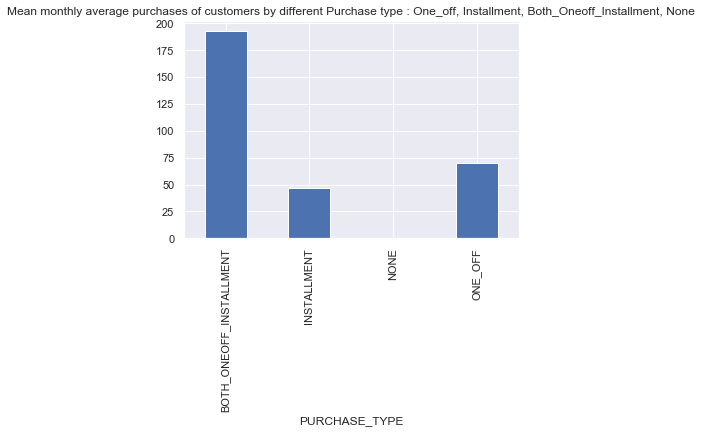

In [46]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_AVERAGE_PURCHASE'])).plot.bar()

plt.title('Mean monthly average purchases of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

- Customers who have both one off and installment purchases have the highest mean monthly average purchase.
- Customers who have only one off purchases have a higher mean monthly average purchase than the customers who have only installment purchases.
- As expected, customers who have no purchases to their names have 0 mean monthly average purchase.

### (2) Monthly Cash Advance Amount

Text(0.5, 1.0, 'Mean Monthly cash advance amount of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

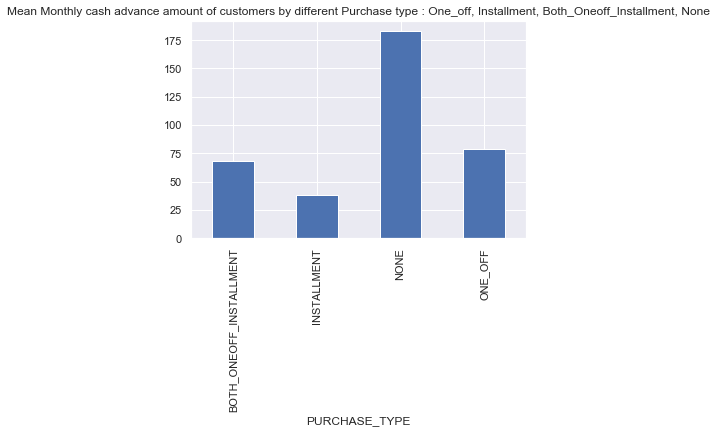

In [47]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['MONTHLY_CASH_ADVANCE_AMOUNT'])).plot.bar()

plt.title('Mean Monthly cash advance amount of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

- Customers who don't make any purchases withdraw the most cash in advance.
- Customers who make only one off purchases withdraw more cash in advance than the customers who make only installment purchases.
- Customers who make only installlment purchases take the least cash in advance.

### (3) Average Amount Per Purchase

Text(0.5, 1.0, 'Mean average amount per purchase of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

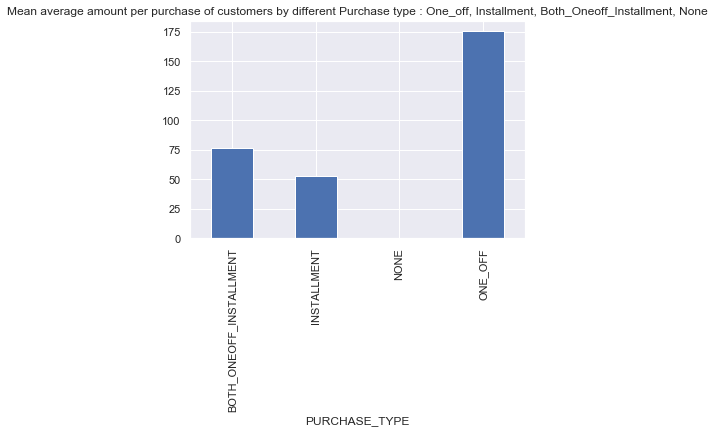

In [48]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['AVERAGE_AMOUNT_PER_PURCHASE'])).plot.bar()

plt.title('Mean average amount per purchase of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

- Customers who have only one off purchases have the highest mean average amount per purchase.
- Customers who have both one off and installment purchases have a higher mean average amount per purchase than the customers who have only installment purchases.
- As expected, customers who have no purchases to their names have 0 mean average amount per purchase.

### (4) Average Cash Advance Transaction

Text(0.5, 1.0, 'Mean average cash advance transaction of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

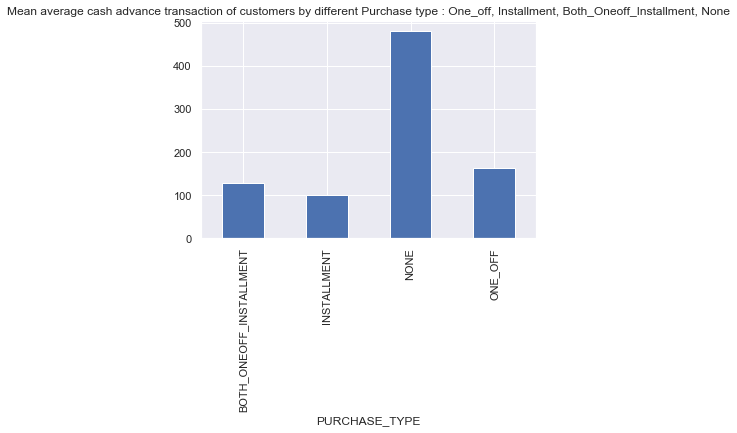

In [49]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['AVERAGE_CASH_ADVANCE_TRANSACTION'])).plot.bar()

plt.title('Mean average cash advance transaction of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

- Customers who have no purchases to their names have the highest mean average cash advance transaction.
- Customers who have only one off purchases have a higher mean average cash advance transaction than the customers who have only installlment purchases.
- Customers who have only installment purchases have the least mean average cash advance transaction.

### (5) Limit Usage (Balance to Credit Limit ratio)

Text(0.5, 1.0, 'Mean limit usage of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

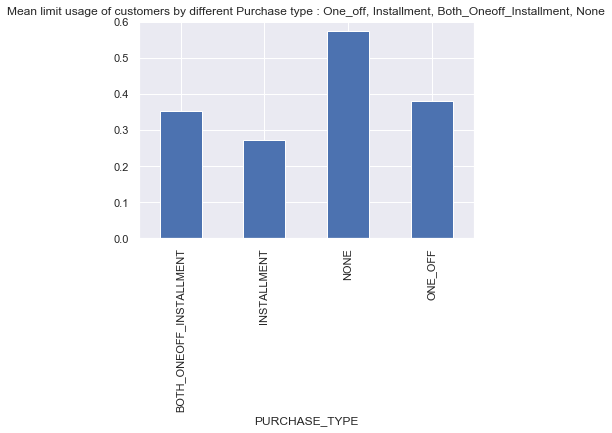

In [50]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['LIMIT_USAGE'])).plot.bar()

plt.title('Mean limit usage of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

- **Lower value of limit usage means a good credit score.**
- Customers who have only installment purchases have the best credit score.
- Customers who have both one off and instalment purchases have a better credit score than the customers who have only one off purchases.
- Customers who don't make any purchases have the worst credit score.

### (6) Payments to Minimum Payments ratio

Text(0.5, 1.0, 'Mean payments to minimum payments of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

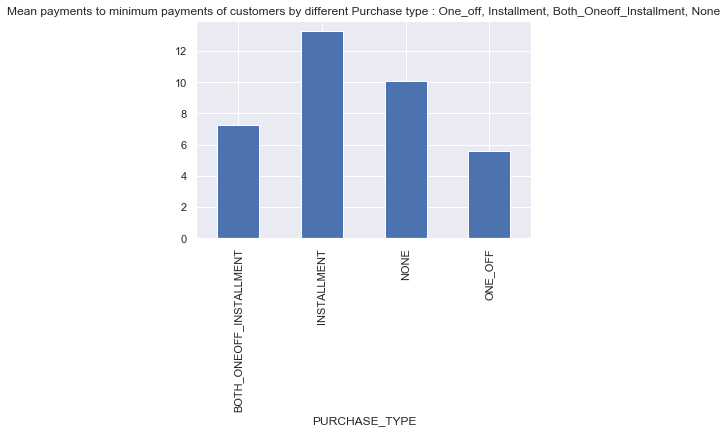

In [51]:
df.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENTS_TO_MINIMUM_PAYMENTS'])).plot.bar()

plt.title('Mean payments to minimum payments of customers by different Purchase type : One_off, Installment, Both_Oneoff_Installment, None')

- Customers who have only installment purchases have the highest mean payments to minimum payments ratio.
- Customers who don't make any purchases have the second highest mean payments to minimum payments ratio.
- Customers who make both one off and installment purchases have a higher mean payments to minimum payments ratio than the customers who have only one off purchases.
- Customers who have only one off purchases have the lowest mean payments to minimum payments ratio.

Now, let's remove the KPIs and the copies of the features we have used to gain insights.

In [52]:
to_be_removed = ['MONTHLY_AVERAGE_PURCHASE','MONTHLY_CASH_ADVANCE_AMOUNT','AVERAGE_AMOUNT_PER_PURCHASE','AVERAGE_CASH_ADVANCE_TRANSACTION','LIMIT_USAGE','PAYMENTS_TO_MINIMUM_PAYMENTS','PURCHASE_TYPE','PURCHASES_TRX_COPY','CASH_ADVANCE_TRX_COPY']

In [53]:
df.shape

(8950, 26)

In [54]:
df  = df.drop(to_be_removed, axis = 1)

In [55]:
df.shape

(8950, 17)

In [56]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Outlier Analysis

Let's check for outliers in the features.

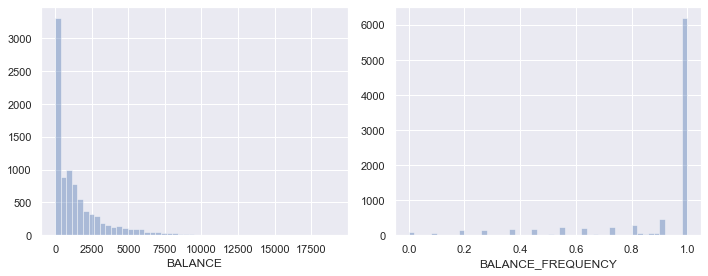

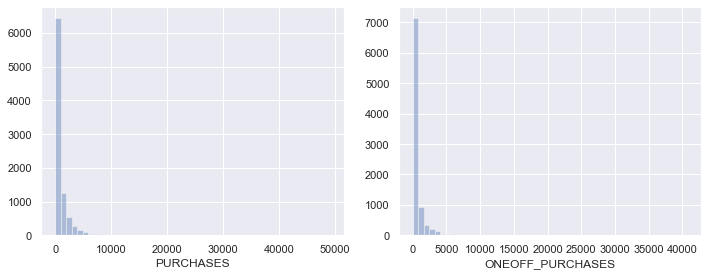

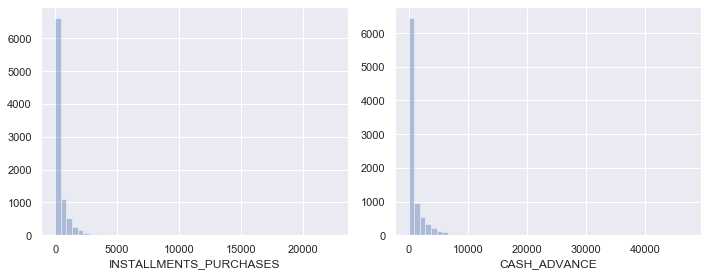

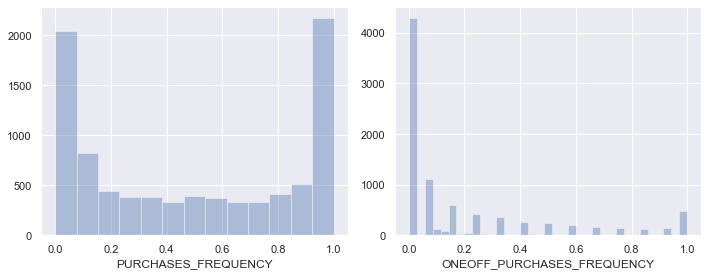

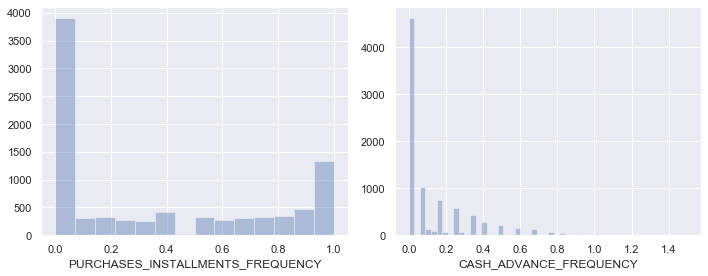

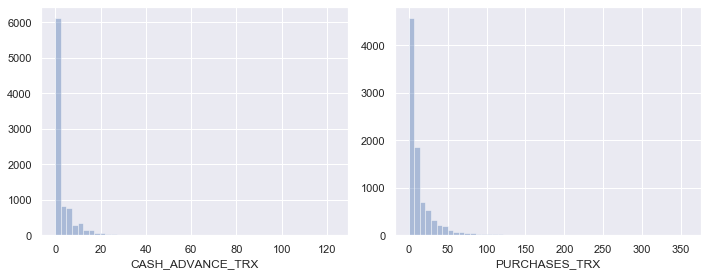

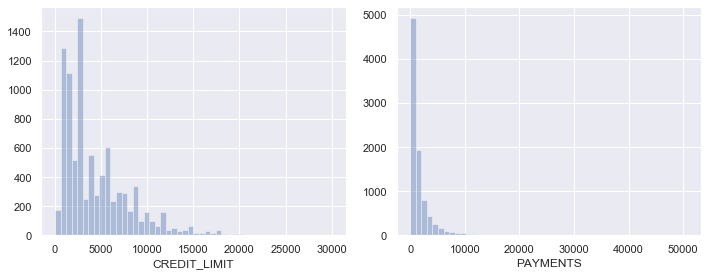

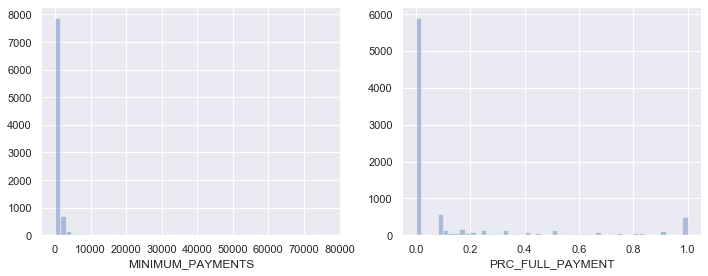

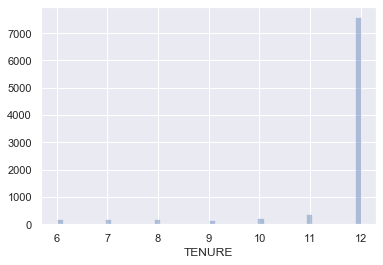

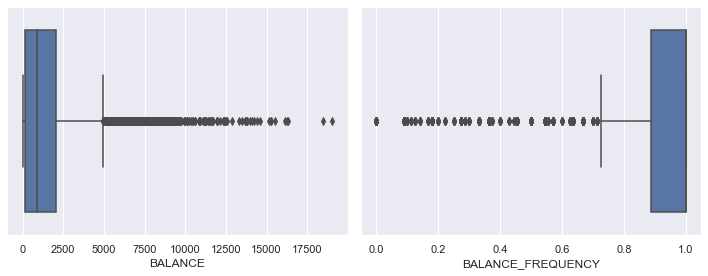

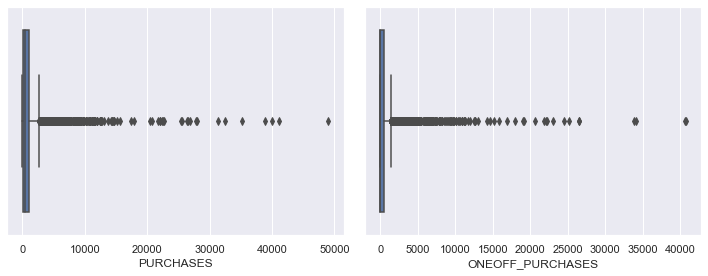

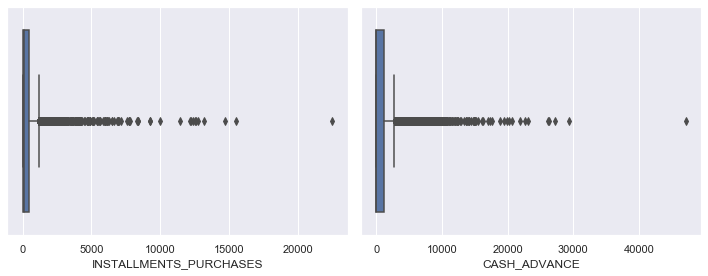

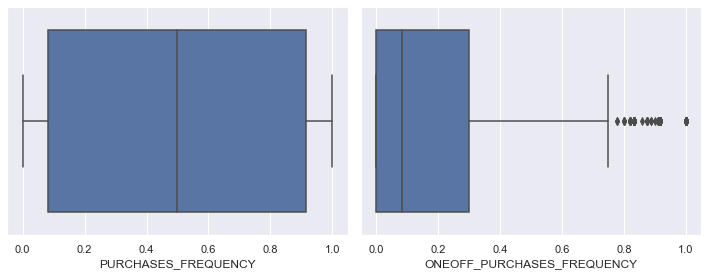

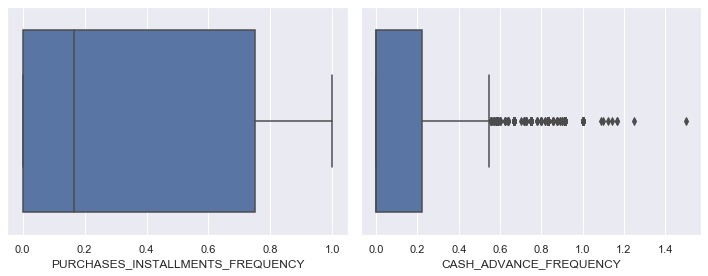

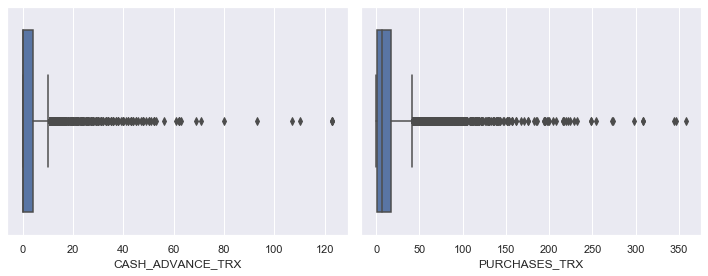

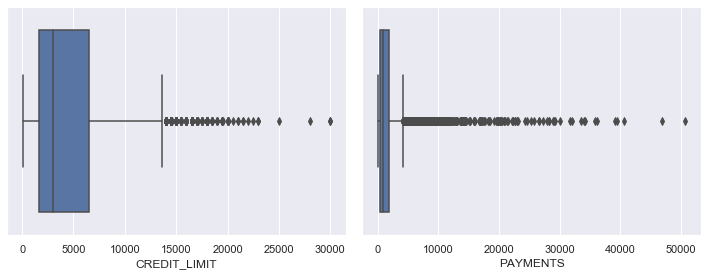

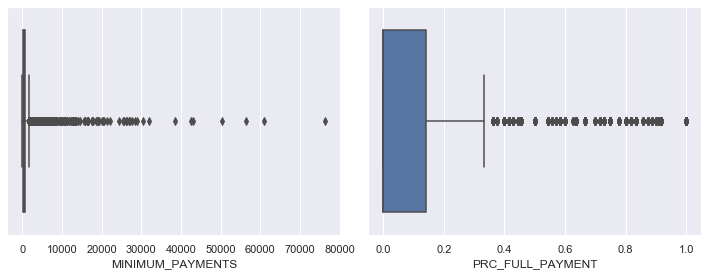

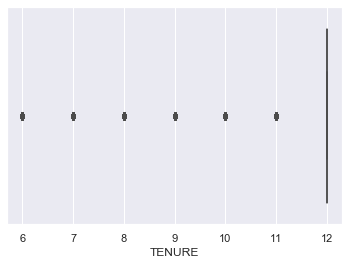

In [57]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(df)            
plot_box_plots(df)


- There are outliers in the dataset. Let's calculate thier number for every feature.

In [58]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,BALANCE,695
1,BALANCE_FREQUENCY,1493
2,PURCHASES,808
3,ONEOFF_PURCHASES,1013
4,INSTALLMENTS_PURCHASES,867
5,CASH_ADVANCE,1030
6,PURCHASES_FREQUENCY,0
7,ONEOFF_PURCHASES_FREQUENCY,782
8,PURCHASES_INSTALLMENTS_FREQUENCY,0
9,CASH_ADVANCE_FREQUENCY,525


We will apply log transformation on the features to get rid of outliers.

We will drop two features,PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY since they don't have any outliers in them and hence don't need the log transformation. 

In [59]:
#Log tranformation
df_log = df.drop(['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'], axis = 1).applymap(lambda x: np.log(x+1))

Let's add the two dropped features in our modified dataset.

In [60]:
df_log['PURCHASES_FREQUENCY'] = df['PURCHASES_FREQUENCY']
df_log['PURCHASES_INSTALLMENTS_FREQUENCY'] = df['PURCHASES_INSTALLMENTS_FREQUENCY']

In [61]:
df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.000000,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,0.166667,0.083333
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,0.000000
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,1.000000,0.000000
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,0.083333,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.083333,0.000000


# Correlation Analysis

Let's check for correlation among the features in the dataset. This will help us in Feature Selection when we will need to reduce the dimensionality of the dataset by removing some features.

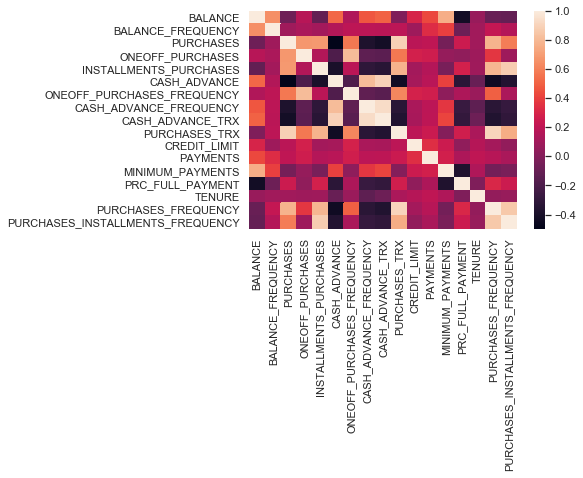

In [62]:
sns.heatmap(df_log.corr())

In [63]:
df_log.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
BALANCE,1.000000,0.651090,-0.074977,0.180434,-0.110924,0.521648,0.155496,0.471372,0.504146,-0.017178,0.299822,0.429075,0.762724,-0.422927,0.073321,-0.093945,-0.107077
BALANCE_FREQUENCY,0.651090,1.000000,0.097349,0.140170,0.110565,0.163330,0.199116,0.195083,0.191347,0.197594,0.092293,0.333618,0.402365,-0.081456,0.104259,0.224041,0.169436
PURCHASES,-0.074977,0.097349,1.000000,0.683510,0.685390,-0.496556,0.574839,-0.377194,-0.416668,0.888988,0.187693,0.206779,-0.050899,0.255512,0.103182,0.781750,0.592411
ONEOFF_PURCHASES,0.180434,0.140170,0.683510,1.000000,0.161434,-0.190146,0.813939,-0.128787,-0.144803,0.574393,0.284852,0.267027,0.059035,0.041784,0.090432,0.373634,0.092781
INSTALLMENTS_PURCHASES,-0.110924,0.110565,0.685390,0.161434,1.000000,-0.394318,0.191380,-0.310150,-0.335621,0.782683,0.106577,0.165432,-0.038362,0.281549,0.095765,0.794784,0.878672
CASH_ADVANCE,0.521648,0.163330,-0.496556,-0.190146,-0.394318,1.000000,-0.184706,0.814491,0.898398,-0.430773,0.119428,0.182519,0.407316,-0.325736,-0.097395,-0.432610,-0.356494
ONEOFF_PURCHASES_FREQUENCY,0.155496,0.199116,0.574839,0.813939,0.191380,-0.184706,1.000000,-0.123254,-0.145991,0.621698,0.289817,0.274090,0.040562,0.142205,0.078533,0.500105,0.140159
CASH_ADVANCE_FREQUENCY,0.471372,0.195083,-0.377194,-0.128787,-0.310150,0.814491,-0.123254,1.000000,0.936469,-0.327403,0.132114,0.193442,0.373729,-0.269970,-0.130268,-0.332598,-0.282222
CASH_ADVANCE_TRX,0.504146,0.191347,-0.416668,-0.144803,-0.335621,0.898398,-0.145991,0.936469,1.000000,-0.357895,0.124585,0.199803,0.416884,-0.294403,-0.076531,-0.367151,-0.305455
PURCHASES_TRX,-0.017178,0.197594,0.888988,0.574393,0.782683,-0.430773,0.621698,-0.327403,-0.357895,1.000000,0.198450,0.246942,0.005417,0.270286,0.139735,0.909024,0.759533


# Feature Scaling

Let's scale the features in the dataset in the scale of 0 to 1. Features with different scales don't work well in clustering algorithms.

In [64]:
scaler = MinMaxScaler()

In [65]:
df_log

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.000000,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,0.166667,0.083333
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,0.000000
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,1.000000,0.000000
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,0.083333,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.000000,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,1.945910,1.000000,0.833333
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.000000,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,1.945910,1.000000,0.833333
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.000000,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,1.945910,0.833333,0.666667
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,1.945910,0.000000,0.000000


In [66]:
df_log.shape

(8950, 17)

In [67]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_log))

In [68]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.000000,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0,0.166667,0.083333
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0,0.000000,0.000000
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0,1.000000,0.000000
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.087355,0.143798,0.117816,0.782631,0.000000,0.510325,0.000000,1.0,0.083333,0.000000
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,1.000000,0.525644,0.000000,0.566509,0.000000,0.000000,0.000000,0.000000,0.330750,0.466811,0.534304,0.346621,0.584963,0.0,1.000000,0.833333
8946,0.304921,1.000000,0.528416,0.000000,0.569497,0.000000,0.000000,0.000000,0.000000,0.330750,0.466811,0.519056,0.510325,0.000000,0.0,1.000000,0.833333
8947,0.324169,0.874469,0.461047,0.000000,0.496890,0.000000,0.000000,0.000000,0.000000,0.304549,0.466811,0.407049,0.392423,0.321928,0.0,0.833333,0.666667
8948,0.271065,0.874469,0.000000,0.000000,0.000000,0.336954,0.000000,0.168234,0.227915,0.000000,0.358276,0.367415,0.358114,0.321928,0.0,0.000000,0.000000


In [69]:
for i in range(len(df_log.columns)):
    df_scaled.rename(columns={i:df_log.columns[i]},inplace=True)

In [70]:
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,0.379045,0.862497,0.422994,0.000000,0.455879,0.000000,0.000000,0.000000,0.000000,0.186733,0.466811,0.490324,0.438874,0.000000,1.0,0.166667,0.083333
1,0.819116,0.932886,0.000000,0.000000,0.000000,0.815075,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620013,0.289506,1.0,0.000000,0.000000
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.572303,0.000000,1.0,1.000000,0.000000
3,0.752871,0.710494,0.677125,0.688918,0.000000,0.495472,0.115477,0.087355,0.143798,0.117816,0.782631,0.000000,0.510325,0.000000,1.0,0.083333,0.000000
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.115477,0.000000,0.000000,0.117816,0.495375,0.601905,0.488693,0.000000,1.0,0.083333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,1.000000,0.525644,0.000000,0.566509,0.000000,0.000000,0.000000,0.000000,0.330750,0.466811,0.534304,0.346621,0.584963,0.0,1.000000,0.833333
8946,0.304921,1.000000,0.528416,0.000000,0.569497,0.000000,0.000000,0.000000,0.000000,0.330750,0.466811,0.519056,0.510325,0.000000,0.0,1.000000,0.833333
8947,0.324169,0.874469,0.461047,0.000000,0.496890,0.000000,0.000000,0.000000,0.000000,0.304549,0.466811,0.407049,0.392423,0.321928,0.0,0.833333,0.666667
8948,0.271065,0.874469,0.000000,0.000000,0.000000,0.336954,0.000000,0.168234,0.227915,0.000000,0.358276,0.367415,0.358114,0.321928,0.0,0.000000,0.000000


# Factor Analysis

Let's apply Factor Analysis as instructed.
Factor Analysis is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

### Adequacy Test

Before we perform Factor Analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we find factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
- Bartlett’s Test
- Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test is found statistically insignificant, we should not employ the Factor Analysis.

**We must get the p-value as 0 for the test to be statistically significant.**

In [71]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)
chi_square_value, p_value

(155553.5564864783, 0.0)

The p-value is 0, the test was statistically significant.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for Factor Analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variables. Lower proportion is more suitable for Factor Analysis. 

**KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.**

In [72]:
kmo_all,kmo_model=calculate_kmo(df_scaled)

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [73]:
kmo_model

0.7304435563948096

The overall KMO value for our data is 0.73 which is greater than 0.6. So, we can proceed with our Factor Analysis.

**Number of Factors**

Let's decide the number of factors. To choose the number of factors we can use the Kaiser criterion and the scree plot. Both are based on eigenvalues.

In [74]:
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()

In [75]:
eigen_values

array([5.80978196, 3.74626247, 1.61583453, 1.24475219, 1.12614141,
       0.86794893, 0.71402938, 0.51889615, 0.42845109, 0.27797887,
       0.18486355, 0.1421782 , 0.11467596, 0.09268569, 0.04677545,
       0.04135432, 0.02738984])

We have only 5 factors for which the eigen value is greater than 1. So, we will choose only 5 factors.

Let's create a Scree plot to confirm this.

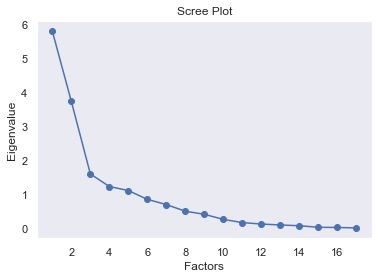

In [76]:
# Creating a scree plot using matplotlib
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The number of eigen values greater than 1 are 5. Hence, we will choose 5 factors.

**Now, let's perform Factor Analysis.**

In [77]:
fa.set_params(n_factors=5, rotation='oblimin')
fa.fit(df_scaled)
loadings = fa.loadings_

In [78]:
fa

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='oblimin',
               rotation_kwargs={}, use_smc=True)

In [79]:
df_loadings = pd.DataFrame(loadings)

df_loadings

,0,1,2,3,4
0,-0.028568,0.028996,0.966635,0.042352,0.066895
1,0.191170,-0.032712,0.558249,-0.012016,0.116812
2,0.530771,-0.136354,-0.030395,0.509196,0.017613
3,-0.060645,-0.017192,0.042891,0.962536,0.013540
4,0.896889,-0.048483,-0.014494,-0.103009,0.064409
5,-0.097544,0.800899,0.094822,-0.054974,0.021634
6,0.033188,0.009774,-0.002886,0.815612,0.100334
7,0.035434,0.962258,-0.022863,0.032520,-0.000827
8,0.029167,1.015978,-0.010364,0.015415,0.006742
9,0.739773,-0.045647,0.015660,0.407437,0.033411


Let's give the rows and columns proper names.

In [80]:
df_loadings.columns = ['Factor 1','Factor 2','Factor 3','Factor 4','Factor 5']

In [81]:
df_loadings.index = df_scaled.columns

In [82]:
df_loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
BALANCE,-0.028568,0.028996,0.966635,0.042352,0.066895
BALANCE_FREQUENCY,0.191170,-0.032712,0.558249,-0.012016,0.116812
PURCHASES,0.530771,-0.136354,-0.030395,0.509196,0.017613
ONEOFF_PURCHASES,-0.060645,-0.017192,0.042891,0.962536,0.013540
INSTALLMENTS_PURCHASES,0.896889,-0.048483,-0.014494,-0.103009,0.064409
CASH_ADVANCE,-0.097544,0.800899,0.094822,-0.054974,0.021634
ONEOFF_PURCHASES_FREQUENCY,0.033188,0.009774,-0.002886,0.815612,0.100334
CASH_ADVANCE_FREQUENCY,0.035434,0.962258,-0.022863,0.032520,-0.000827
CASH_ADVANCE_TRX,0.029167,1.015978,-0.010364,0.015415,0.006742
PURCHASES_TRX,0.739773,-0.045647,0.015660,0.407437,0.033411


- Factor 1 has high Factor Loadings for PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_TRX, PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY.
- Factor 2 has high Factor Loadings for CASH_ADVANCE, CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX.
- Factor 3 has high Factor Loadings for BALANCE, BALANCE_FREQUENCY, MINIMUM_PAYMENTS and PRC_FULL_PAYMENT.
- Factor 4 has high Factor Loadings for ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY.
- Factor 5 has high Factor Loadings for PAYMENTS.

Let's get the Variance for each factor. 

In [83]:
Factor_Variance = pd.DataFrame(fa.get_factor_variance())

In [84]:
Factor_Variance

,0,1,2,3,4
0,3.479594,2.702107,2.178052,2.159736,0.935523
1,0.204682,0.158947,0.128121,0.127043,0.055031
2,0.204682,0.363629,0.491750,0.618794,0.673824


Let's rename the rows and columns.

In [85]:
Factor_Variance.columns = ['Factor 1','Factor 2','Factor 3','Factor 4','Factor 5']
Factor_Variance.index = ['SS Loadings', "Proportion Variance", "Cumulative Variance"]

In [86]:
Factor_Variance

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
SS Loadings,3.479594,2.702107,2.178052,2.159736,0.935523
Proportion Variance,0.204682,0.158947,0.128121,0.127043,0.055031
Cumulative Variance,0.204682,0.363629,0.491750,0.618794,0.673824


Therefore, more than 65% of variance is explained by the 5 factors.

# Feature Selection

We want to select only 10 features for the clustering purpose. We are considering only 10 features because more number of features will make it difficult for us to make conclusions about the clusters.

We will use the findings of Correlation Analysis and Factor Analysis to choose the features.

In the Factor Analysis, we got 15 features which had high Factor Loadings for their corresponding Factors. Now, we will choose only those features which have Factor Loading value of at least 0.7.

In [87]:
df_loadings.loc [(df_loadings['Factor 1'] > 0.7) | (df_loadings['Factor 1'] < (-0.7))]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
INSTALLMENTS_PURCHASES,0.896889,-0.048483,-0.014494,-0.103009,0.064409
PURCHASES_TRX,0.739773,-0.045647,0.015660,0.407437,0.033411
PURCHASES_FREQUENCY,0.861244,-0.015065,-0.026135,0.200799,-0.004458
PURCHASES_INSTALLMENTS_FREQUENCY,1.013093,0.002226,0.021028,-0.199084,-0.005864


In [88]:
df_loadings.loc[(df_loadings['Factor 2']  > 0.7) | (df_loadings['Factor 2'] < (-0.7))]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
CASH_ADVANCE,-0.097544,0.800899,0.094822,-0.054974,0.021634
CASH_ADVANCE_FREQUENCY,0.035434,0.962258,-0.022863,0.032520,-0.000827
CASH_ADVANCE_TRX,0.029167,1.015978,-0.010364,0.015415,0.006742


In [89]:
df_loadings.loc[(df_loadings['Factor 3']  > 0.7) | (df_loadings['Factor 3'] < (-0.7))]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
BALANCE,-0.028568,0.028996,0.966635,0.042352,0.066895
MINIMUM_PAYMENTS,0.065131,0.045309,0.756920,-0.047999,0.007142


In [90]:
df_loadings.loc[(df_loadings['Factor 4']  > 0.7) | (df_loadings['Factor 4'] < (-0.7))]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
ONEOFF_PURCHASES,-0.060645,-0.017192,0.042891,0.962536,0.013540
ONEOFF_PURCHASES_FREQUENCY,0.033188,0.009774,-0.002886,0.815612,0.100334


In [91]:
df_loadings.loc[(df_loadings['Factor 5']  > 0.7) | (df_loadings['Factor 5'] < (-0.7))]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
PAYMENTS,-0.017554,0.053133,0.11834,0.035871,0.7536


We got 12 features which have Factor loadings of at least 0.7 for their corresponding features.

Let's make use of the Correlation Analysis to reduce two more features.

- PURCHASES_FREQUENCY has high correlation values with PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_TRX and PURCHASES_INSTALLMENTS_FREQUENCY.
- CASH_ADVANCE_FREQUENCY has high correlation values with CASH_ADVANCE and CASH_ADVANCE_TRX.

So, we will further remove these two features.

In [92]:
to_be_dropped = ['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','BALANCE_FREQUENCY','PRC_FULL_PAYMENT','CREDIT_LIMIT', 'TENURE']

In [93]:
df_preprocessed = df_scaled.drop(to_be_dropped, axis = 1)

In [94]:
df_preprocessed

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PURCHASES_INSTALLMENTS_FREQUENCY
0,0.379045,0.000000,0.455879,0.000000,0.000000,0.000000,0.186733,0.490324,0.438874,0.083333
1,0.819116,0.000000,0.000000,0.815075,0.000000,0.333889,0.000000,0.767919,0.620013,0.000000
2,0.793799,0.626611,0.000000,0.000000,1.000000,0.000000,0.435970,0.593925,0.572303,0.000000
3,0.752871,0.688918,0.000000,0.495472,0.115477,0.143798,0.117816,0.000000,0.510325,0.000000
4,0.680676,0.266894,0.000000,0.000000,0.115477,0.000000,0.117816,0.601905,0.488693,0.000000
...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,0.000000,0.566509,0.000000,0.000000,0.000000,0.330750,0.534304,0.346621,0.833333
8946,0.304921,0.000000,0.569497,0.000000,0.000000,0.000000,0.330750,0.519056,0.510325,0.833333
8947,0.324169,0.000000,0.496890,0.000000,0.000000,0.000000,0.304549,0.407049,0.392423,0.666667
8948,0.271065,0.000000,0.000000,0.336954,0.000000,0.227915,0.000000,0.367415,0.358114,0.000000


In [95]:
df_preprocessed.shape

(8950, 10)

# Clustering

We will be using k-Means Clustering.

Let's select an arbitrary range for the number of clusters and calculate the Cluster errors.

In [96]:
cluster_range = range( 1, 21 )
wcss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df_preprocessed )
    wcss.append( clusters.inertia_ )

In [97]:
clusters_df = pd.DataFrame( { "Number_of_clusters":cluster_range, "WCSS": wcss } )

clusters_df[0:21]

,Number_of_clusters,WCSS
0,1,6499.137012
1,2,4159.757721
2,3,3221.492659
3,4,2469.632313
4,5,2107.635060
5,6,1885.859745
6,7,1698.459120
7,8,1556.996202
8,9,1445.973205
9,10,1363.841909


Let's plot the Elbow plot to decide the optimal number of clusters for our dataset.

Text(0, 0.5, 'Within Cluster Sum of Squares')

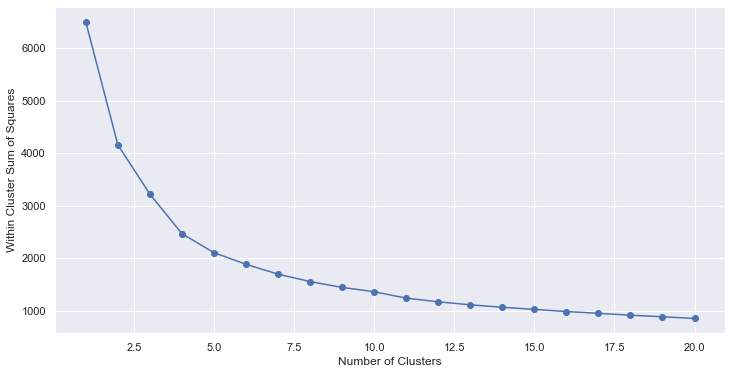

In [98]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.Number_of_clusters, clusters_df.WCSS,marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")

**We select 4 clusters.**

Let's fit the clustering algorithm and assign the customers the suitable clusters.

In [99]:
kmeans_4 = KMeans(4, random_state = 100)
kmeans_4.fit(df_preprocessed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [100]:
kmeans_4.labels_

array([0, 1, 2, ..., 0, 1, 2])

In [101]:
pd.Series(kmeans_4.labels_).value_counts()

1    2849
0    2441
3    1957
2    1703
dtype: int64

- Cluster 0 consists of 27.27% of the total data.
- Cluster 1 consists of 31.83% of the total data.
- Cluster 2 consists of 19.02% of the total data.
- Cluster 3 consists of 21.86% of the total data.

Let's add the Cluster labels to our dataset.

In [102]:
df_cluster_4 = pd.concat([df_preprocessed,pd.Series(kmeans_4.labels_,name = 'Cluster')],axis = 1)

In [103]:
df_cluster_4

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PURCHASES_INSTALLMENTS_FREQUENCY,Cluster
0,0.379045,0.000000,0.455879,0.000000,0.000000,0.000000,0.186733,0.490324,0.438874,0.083333,0
1,0.819116,0.000000,0.000000,0.815075,0.000000,0.333889,0.000000,0.767919,0.620013,0.000000,1
2,0.793799,0.626611,0.000000,0.000000,1.000000,0.000000,0.435970,0.593925,0.572303,0.000000,2
3,0.752871,0.688918,0.000000,0.495472,0.115477,0.143798,0.117816,0.000000,0.510325,0.000000,2
4,0.680676,0.266894,0.000000,0.000000,0.115477,0.000000,0.117816,0.601905,0.488693,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
8945,0.343413,0.000000,0.566509,0.000000,0.000000,0.000000,0.330750,0.534304,0.346621,0.833333,0
8946,0.304921,0.000000,0.569497,0.000000,0.000000,0.000000,0.330750,0.519056,0.510325,0.833333,0
8947,0.324169,0.000000,0.496890,0.000000,0.000000,0.000000,0.304549,0.407049,0.392423,0.666667,0
8948,0.271065,0.000000,0.000000,0.336954,0.000000,0.227915,0.000000,0.367415,0.358114,0.000000,1


Let's find the mean of each feature for every cluster since mean gives us a good idea about the distribution of the data.

In [104]:
clusters = df_cluster_4.groupby('Cluster').apply(lambda x: x[df_preprocessed.columns].mean()).T

clusters

Cluster,0,1,2,3
BALANCE,0.477681,0.722987,0.574223,0.711481
ONEOFF_PURCHASES,0.062929,0.108409,0.574206,0.644456
INSTALLMENTS_PURCHASES,0.581787,0.046450,0.096566,0.652575
CASH_ADVANCE,0.077514,0.649259,0.106188,0.276320
ONEOFF_PURCHASES_FREQUENCY,0.021027,0.045987,0.430142,0.579594
CASH_ADVANCE_TRX,0.037888,0.361644,0.049779,0.158627
PURCHASES_TRX,0.403677,0.063917,0.323521,0.594750
PAYMENTS,0.562388,0.612996,0.583349,0.694856
MINIMUM_PAYMENTS,0.485914,0.558778,0.495866,0.551582
PURCHASES_INSTALLMENTS_FREQUENCY,0.685032,0.023950,0.035750,0.746262


In [105]:
clusters[0].sort_values(ascending = False)

PURCHASES_INSTALLMENTS_FREQUENCY    0.685032
INSTALLMENTS_PURCHASES              0.581787
PAYMENTS                            0.562388
MINIMUM_PAYMENTS                    0.485914
BALANCE                             0.477681
PURCHASES_TRX                       0.403677
CASH_ADVANCE                        0.077514
ONEOFF_PURCHASES                    0.062929
CASH_ADVANCE_TRX                    0.037888
ONEOFF_PURCHASES_FREQUENCY          0.021027
Name: 0, dtype: float64

In [106]:
clusters[1].sort_values(ascending = False)

BALANCE                             0.722987
CASH_ADVANCE                        0.649259
PAYMENTS                            0.612996
MINIMUM_PAYMENTS                    0.558778
CASH_ADVANCE_TRX                    0.361644
ONEOFF_PURCHASES                    0.108409
PURCHASES_TRX                       0.063917
INSTALLMENTS_PURCHASES              0.046450
ONEOFF_PURCHASES_FREQUENCY          0.045987
PURCHASES_INSTALLMENTS_FREQUENCY    0.023950
Name: 1, dtype: float64

In [107]:
clusters[2].sort_values(ascending = False)

PAYMENTS                            0.583349
BALANCE                             0.574223
ONEOFF_PURCHASES                    0.574206
MINIMUM_PAYMENTS                    0.495866
ONEOFF_PURCHASES_FREQUENCY          0.430142
PURCHASES_TRX                       0.323521
CASH_ADVANCE                        0.106188
INSTALLMENTS_PURCHASES              0.096566
CASH_ADVANCE_TRX                    0.049779
PURCHASES_INSTALLMENTS_FREQUENCY    0.035750
Name: 2, dtype: float64

In [108]:
clusters[3].sort_values(ascending = False)

PURCHASES_INSTALLMENTS_FREQUENCY    0.746262
BALANCE                             0.711481
PAYMENTS                            0.694856
INSTALLMENTS_PURCHASES              0.652575
ONEOFF_PURCHASES                    0.644456
PURCHASES_TRX                       0.594750
ONEOFF_PURCHASES_FREQUENCY          0.579594
MINIMUM_PAYMENTS                    0.551582
CASH_ADVANCE                        0.276320
CASH_ADVANCE_TRX                    0.158627
Name: 3, dtype: float64

## Cluster Visualization.

Let's use the PCA (Principal Component Analysis) concepts to visualize our clusters.
PCA basically reduces a dataset of a high dimensionality to a dataset of low dimensionality. The number of features that the PCA reduces the original dataset to can be set by us. We will set it to 2.

In [109]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(df_preprocessed)

principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

principalDf.head(2)

,Principal Component 1,Principal Component 2
0,-0.127923,-0.420105
1,-0.846743,-0.034827


Let's add the clusters to the Principal Components Dataframe.

In [110]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':kmeans_4.labels_})], axis = 1)
finalDf.head()

,Principal Component 1,Principal Component 2,cluster
0,-0.127923,-0.420105,0
1,-0.846743,-0.034827,1
2,0.083970,0.831725,2
3,-0.476582,0.292850,2
4,-0.337891,-0.005400,2


Let's visualize the clusters.

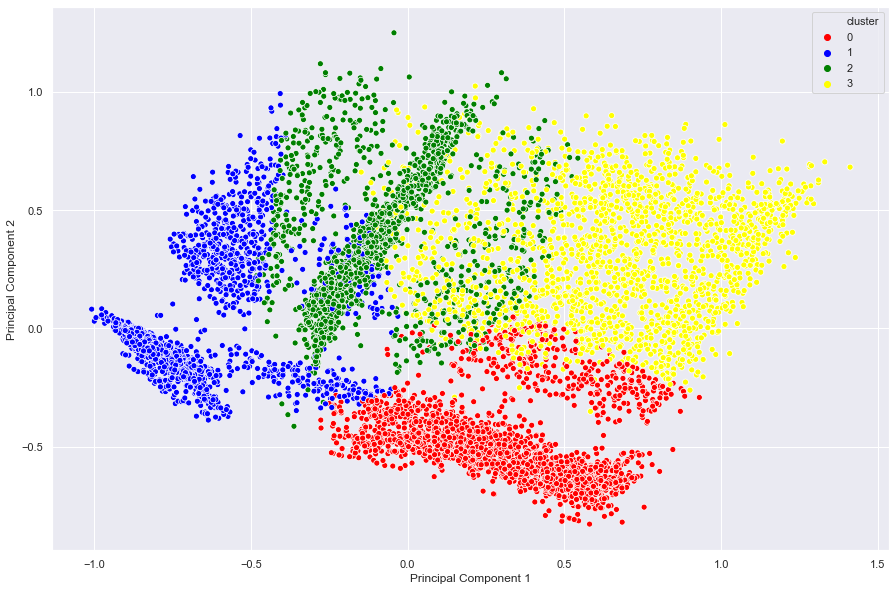

In [111]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x = "Principal Component 1", y = "Principal Component 2", hue = "cluster", data = finalDf, palette=['red','blue','green','yellow'])
plt.show()

# Cluster Observations

### Cluster 0: 

**Consists of 27.27% of the total customer base.**

These customers: 
- make installment purchases frequently.
- have the least amount of one-off purchases.
- take the lowest cash in advance.
- are using their credit cards for a small number of purchases.

**Marketing Strategy Advised:**
- Since this group is making a low number of one off purchases, they can be offered discounts on this type of purchases. 

### Cluster 1:

**Consists of 31.83% of the total customer base.**

These customers:
- take the most cash in advance.
- have a high balance.
- have a low purchase frequency.
- may be using their credit cards as loans.

**Marketing Strategy Advised:** 
- Since this group is not making any purchases, they can be offered low interest rates on installment purchases and discounts on one off purchases.

### Cluster 2:

**Consists of 19.02% of the total customer base.**

These customers:
- make a good amount of one off purchases.
- have a very low frequency of installment purchases.
- have a very low frequency of cash taken in advance.
- may be using their credit cards to pay utility bills.

**Marketing Strategy Advised:**
- They are using their credit cards to pay utility bills, so they can be offered cashback offers on their bills.
- Since this group is not making any installment purchases, they can be offered low interest rates on them.

### Cluster 3:

**Consists of 21.86% of the total customer base.**

These customers:
- have the highest frequency of installment purchases.
- make the highest amount of one off purchases.
- have a very low frequency of cash taken in advance.
- are the big spenders.

**Marketing Strategy Advised:**
- Since this group is performing the best, offering them membership cards, loyalty points, reward points etc will encourage them to make more purchases.